In [16]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import svm
from sklearn.neural_network import MLPClassifier


df = pd.read_csv('IMDB Dataset.csv')
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
start=time.time()
end=time.time()
elapsed=end-start;

In [6]:
df.isnull().sum()

df.dropna(inplace=True)

df.isnull().sum()

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df['sentiment'].value_counts()



positive    25000
negative    25000
Name: sentiment, dtype: int64

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

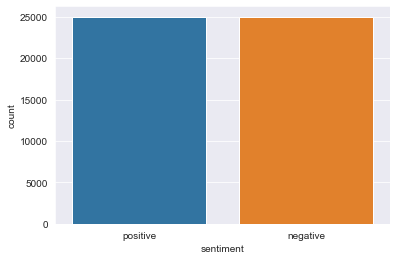

In [8]:
sns.countplot(df['sentiment'])

In [18]:



regex = re.compile(r'<[^>]+>')
def remove_html(string):
    return regex.sub('', string)



ps = PorterStemmer()
corpus = []
reviews=df['review']
for review_val in reviews:

#for i in range(0, 50000):
    review = remove_html(review_val)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

corpus[0]



'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [12]:
tfidfv = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidfv.fit_transform(corpus).toarray()

#converts the 'positve' and 'negative' into '1's and '0's
y = pd.get_dummies(df['sentiment'])

y = y.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8281
           1       0.84      0.87      0.85      8219

    accuracy                           0.85     16500
   macro avg       0.85      0.85      0.85     16500
weighted avg       0.85      0.85      0.85     16500

0.8512121212121212


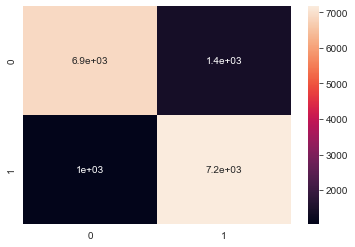

In [13]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8281
           1       0.88      0.91      0.89      8219

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500

0.8915757575757576


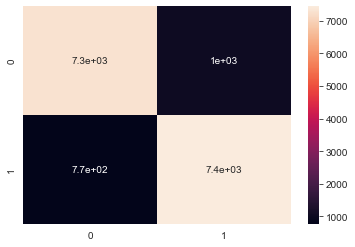

In [14]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      8281
           1       0.87      0.91      0.89      8219

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500

0.887090909090909


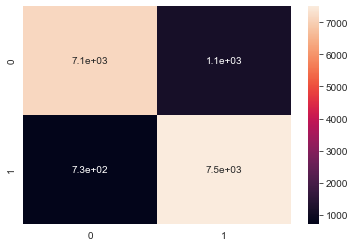

In [38]:
MLP = MLPClassifier(solver='adam', alpha=1,hidden_layer_sizes=(5, 2), random_state=1)

MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

In [31]:
def test_model(text):
    text = tfidfv.transform([text])
    prediction = MLP.predict(text)
    return prediction[0]

In [32]:
res = test_model('Would rather jump in a river than watch this again. Awful film')
print(res)

0


In [33]:
res = test_model('good film')
print(res)

1


In [34]:
res = test_model("I thought RRR 🎥 and Avatar 2 comes down to be best movies of this year But Such a let down Cameron 😞 you Better take classes from Rajamouli. Not a way of Water but The Way of Waste ☹️🙁. In the first film skypeople were in Pandora to mine some metal, now what they are after is basically whale brains that stops humans from aging. The characters have no depth 😮‍💨 a big problem when it comes to Jake's identical two sons They are impossible to tell apart 🤦‍♀️ Why waste such beautiful cinematography and amazing CGI for a plotless movie 🤦‍♂️🤦 The beauty and tension of the first movie is transmogrified into a smorgasbord of scenes including a cruel paraphrasing of a whale hunt Unbelievably long Seems more a recording of a random video game session than something that started with a plot The digital technology that brings us back to Pandora surely is the best technical deployment on film,The first avatar was a surprise and an event, the second opus, thirteen years later, uses the same characters, all of them and their children, resurrected and newborn, to deliver a bad war film, noisy, badly edited, with botched narrative axes🙃🙂 the existence of the General could have been explained better. When there's so much focus on the special effects, than the plot suffers and the most photorealistic CGI ever created but that's it the film has nothing else to offer The plot is laughable Returning villains by Stephen Langz  his friend and they have motivations so laughably thin that is ridiculouus it doesn't even make sense 😴😴 Avatar 2009 wasn't exactly a masterpiece of narrative innovation but at least had a decent plot, it was emotional at some points and it wasn't a bad movie. The Way of Water doesn't have anything 💦 won't tire you with a full plot If you're reading this spoiler, you've either already seen the movie or you don't care much about it so let's get straight to the flaws. There are many of them, so fasten your seatbelt🏎️ The protagonist somehow had children, son, who hates him But when he gets kidnapped he's immediately Oh hi daddy and forgets about his genocides until the end of the movie assive advertising will make sure that many people will go see it anyway no matter how bad the reviews Especially kids willu want to see it James Cameron had more than ten years to perfect the script. There were five people credited for making the story of the film, and of those five, three were credited for screenplay 📼 The movie lasts over 3 hours. Don't get me wrong, I'm one of the few people who do not mind seeing a long movie But for that, movie has to have a good script 🍿🥤 The film will remind you repeatedly that you are watching a sequel to Avatar From repeating lines verbatim from the first film 🥱😴🥱 Not sure how else to sum this up James Cameron has done some great films but his Avatar project is just daft. From Titanic Terminator Avatar one to this my god such let down The Most Expensive Screensaver of All Time 🫠😜🤪😝 The worst think of all is that there is no real end result. The main problem wasn't solved, probably so they can have a reason to make a third part. The only moral of this story is to use birth control or get a vasectomyBetter watch RRR on netflix again and again rather than this piece of _____ !! All in all, I don't thing I will ever see any avatar again as it cannot give you anything at all")
print(res)

0


In [35]:
res = test_model('good film but overall bad i was excited when it ended')
print(res)

0
